In [ ]:
#STOCK MARKET PRICE OF APPLE SHARE PREDICTION

In [359]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [360]:
import yfinance as yf
start_date = datetime(2022 ,9 , 20)
end_date = datetime(2023 , 9 ,19)
data = yf.download('AAPL' , start = start_date , end = end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-20,153.399994,158.080002,153.080002,156.899994,155.974686,107689800
2022-09-21,157.339996,158.740005,153.600006,153.720001,152.813461,101696800
2022-09-22,152.380005,154.470001,150.910004,152.740005,151.839233,86652500
2022-09-23,151.190002,151.470001,148.559998,150.429993,149.542847,96029900
2022-09-26,149.660004,153.770004,149.639999,150.770004,149.880859,93339400
...,...,...,...,...,...,...
2023-09-12,179.490005,180.130005,174.820007,176.300003,176.300003,90370200
2023-09-13,176.509995,177.300003,173.979996,174.210007,174.210007,84267900
2023-09-14,174.000000,176.100006,173.580002,175.740005,175.740005,60895800


In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-09-20 to 2023-09-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [362]:
data.shape

(250, 6)

In [363]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,161.000401,162.762720,159.427600,161.165960,160.722669,6.876669e+07
std,19.156966,18.904436,19.396505,19.131984,19.314871,2.315654e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,145.812500,147.320004,143.957497,145.915001,145.256302,5.126040e+07
50%,157.330002,158.615005,155.129997,157.524994,157.095268,6.416920e+07
75%,177.619999,179.454998,176.565006,177.732494,177.575150,8.038688e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [364]:
import plotly.express as px
import plotly.graph_objects as go

chart = px.area(data.AAPL , title = 'APPLE SHARE PRICE')

In [365]:
aapl = data.reset_index()['Close']

In [366]:
aapl

0      156.899994
1      153.720001
2      152.740005
3      150.429993
4      150.770004
          ...    
245    176.300003
246    174.210007
247    175.740005
248    175.009995
249    177.970001
Name: Close, Length: 250, dtype: float64

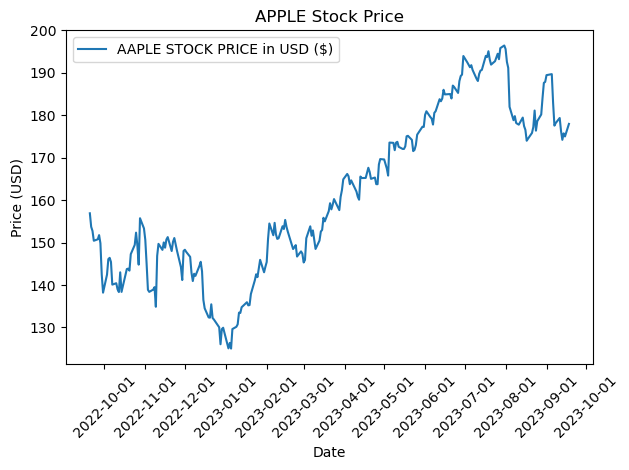

In [367]:
fig , ax = plt.subplots()
ax.plot(data.index , data['Close'] , label ='AAPLE STOCK PRICE in USD ($)')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.xticks(rotation=45)
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.set_title('APPLE Stock Price')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [368]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
aapl = scaler.fit_transform(np.array(aapl).reshape(-1,1))

In [369]:
aapl.shape

(250, 1)

In [370]:
training_size=int(len(aapl)*0.7)
test_size = len(aapl)-training_size
train_data , test_data = aapl[0:training_size,:] , aapl[training_size:len(aapl),:1]


In [371]:
train_data.shape  #training data is 70% of total data , i,e. 251 * 70% = 175

(175, 1)

In [372]:
test_data.shape   #30% is test_data out of 251 total

(75, 1)

In [373]:
X_train = []
Y_train = []
for i in range(30,250):
    X_train.append(aapl[i-30:i, 0])
    Y_train.append(aapl[i,0])
X_train , Y_train = np.array(X_train)  , np.array(Y_train)

In [374]:
X_train.shape 

(220, 30)

In [375]:
Y_train.shape

(220,)

In [376]:
#RESHAPE THE DATA
X_train = np.reshape(X_train,(X_train.shape[0] , X_train.shape[1], 1))
X_train.shape


(220, 30, 1)

In [377]:
#Create a new array for test data


x_test = []
y_test = aapl[training_size : , :]
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])
    
x_test = np.array(x_test)

#reshape the data
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))


In [378]:
test_data = aapl[training_size - 30 : , :]
x_test = []
y_test = aapl[training_size : , :]
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i , 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

In [379]:
#Building Keras Model and adding Different layers of LSTM

In [380]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [381]:
model = Sequential()
model.add(LSTM(30, return_sequences = True , input_shape=(30 , 1)))   #input_shape value is X_train.shape value
model.add(LSTM(30 , return_sequences= True))
model.add(LSTM(30))
model.add(Dense(1))

In [382]:
model.compile(loss='mean_squared_error' , optimizer = 'adam')

In [383]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 30, 30)            3840      
                                                                 
 lstm_32 (LSTM)              (None, 30, 30)            7320      
                                                                 
 lstm_33 (LSTM)              (None, 30)                7320      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 18511 (72.31 KB)
Trainable params: 18511 (72.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [384]:
model.fit(X_train , Y_train , validation_data=(x_test , y_test), epochs = 100 , batch_size = 32 , verbose = 1)

Epoch 1/100
7/7 [==============================] - 2s 74ms/step - loss: 0.2649 - val_loss: 0.2449
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0483 - val_loss: 0.0407
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0372 - val_loss: 0.0279
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0249 - val_loss: 0.0428
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0186 - val_loss: 0.0094
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0151 - val_loss: 0.0105
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0124 - val_loss: 0.0136
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0113 - val_loss: 0.0110
Epoch 9/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0103 - val_loss: 0.0107
Epoch 10/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 11/100
7/7 [=

Epoch 84/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 85/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 86/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 87/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 88/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 89/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 90/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 91/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 92/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 93/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0039 - val_loss: 0.0049
Epoch 94/1

In [385]:
#get models predicted price values
train_predict = model.predict(X_train)

predictions = model.predict(x_test)

train_predict = scaler.inverse_transform(train_predict)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 0s 2ms/step


In [386]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train , train_predict))

163.48341623848702

In [387]:
math.sqrt(mean_squared_error(y_test , predictions))

183.6674815898705

/var/folders/6r/l476phk96wl9m4s89jf19zw80000gn/T/ipykernel_1195/3024565503.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



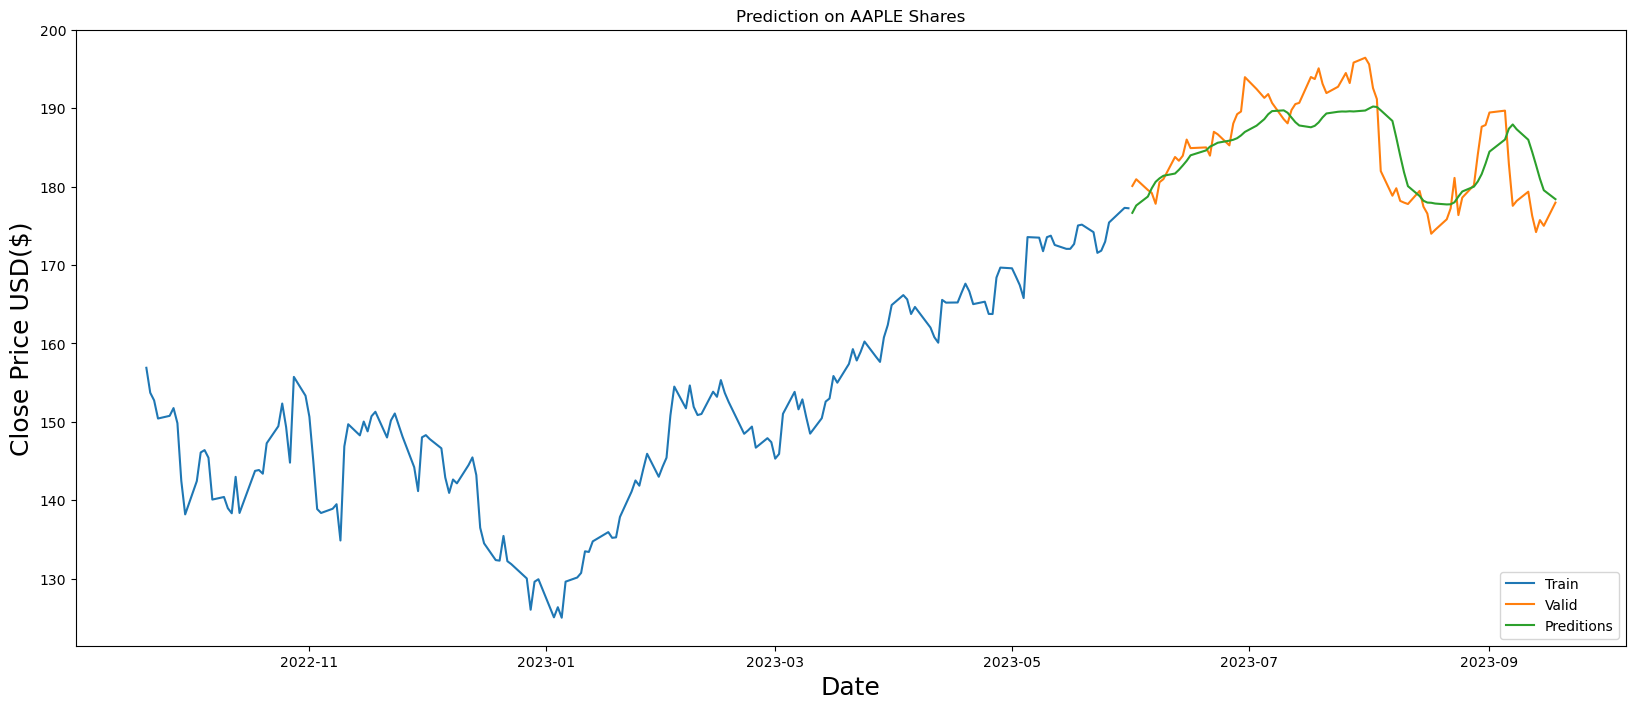

In [388]:
#plotting the  predicted values
train = data[:training_size]
valid = data[training_size : ]
valid['Predictions'] = predictions

plt.figure(figsize = (20,8))
plt.title('Prediction on AAPLE Shares')
plt.xlabel('Date' , fontsize = 18)
plt.ylabel('Close Price USD($)' , fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train' , 'Valid' , 'Preditions'], loc='lower right')

plt.show()

In [389]:
# predicited prices 
valid

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2023-06-01,177.699997,180.119995,176.929993,180.089996,179.847137,68901800,176.663559
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.705978,61945900,177.597809
2023-06-05,182.630005,184.949997,178.039993,179.580002,179.337830,121946500,178.740189
2023-06-06,179.970001,180.119995,177.429993,179.210007,178.968338,64848400,179.799271
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.580200,61944600,180.619720
...,...,...,...,...,...,...,...
2023-09-12,179.490005,180.130005,174.820007,176.300003,176.300003,90370200,184.442886
2023-09-13,176.509995,177.300003,173.979996,174.210007,174.210007,84267900,182.761124
2023-09-14,174.000000,176.100006,173.580002,175.740005,175.740005,60895800,181.016663
